# Tutorial 9: Monte Carlo
We are going to solve some problems using the Monte Carlo approach.

## 1. Unit square
**Comment**: In this section, I solve the problem in a couple of ways to confirm the value, but, *as long as you correctly do it once*, you're all good.

### (a) Estimate the average distance between two random points in a unit square with bounds $[0, 1]^{2}$. Do it with `for` loops only.

In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

In [2]:
# Create a list 
random_numbers = []

# Seed
np.random.seed(13)

# Run the loop
for i in range(2_000_000):
    
    # Generate a random number between 0 and 1
    number = np.random.rand()

    # Append it
    random_numbers.append(number)

In [3]:
# Since we need two coordinates, reshape it as
points = np.array(random_numbers).reshape(2_000_000//2, 2)

print(points, points.shape)

[[0.77770241 0.23754122]
 [0.82427853 0.9657492 ]
 [0.97260111 0.45344925]
 ...
 [0.25485405 0.40310216]
 [0.47810051 0.96377361]
 [0.45277995 0.32418574]] (1000000, 2)


In [4]:
# List for the distance
distance_list = []

# Loop
for i in range(points.shape[0]-1):
    
    # Difference in x
    x_diff = points[i+1][0]-points[i][0]

    # Difference in y
    y_diff = points[i+1][1]-points[i][1]

    # Distance
    d = np.sqrt(x_diff**2 + y_diff**2)

    # Append
    distance_list.append(d)

In [5]:
# So that the value should be
print(f"Results using loops: {np.mean(distance_list)}.")

Results using loops: 0.5213161909526843.


In [6]:
len(distance_list)

999999

### (b) Visually show how convergence is achieved as the sample of random points gets larger.

In [7]:
# Create an empty list
mean_list = []

# Loop
for i in range(999):
    
    # Mean with different number of random points
    mean = np.mean(distance_list[0: (i+1)*1000])

    # Append them
    mean_list.append(mean)

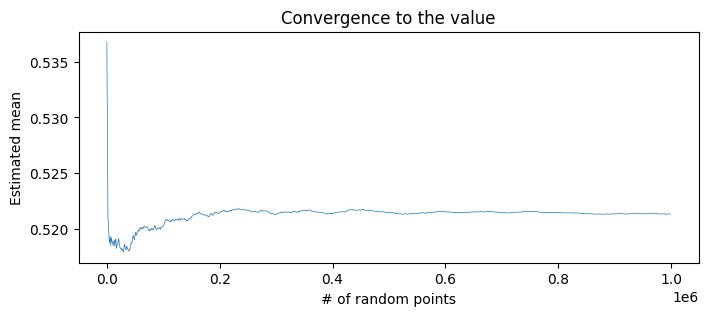

In [8]:
# Plot
plt.figure(figsize=(8,3))
plt.plot(np.linspace(0, 999*1000, 999), np.array(mean_list), lw = 0.5)

plt.title("Convergence to the value")
plt.xlabel("# of random points")
plt.ylabel("Estimated mean")

plt.show()
plt.close()

It seems to stabilize at the end. You might increase the number of points above, but be careful. My computer could not handle more than $5$ million points.

Let's the variation of estimations.

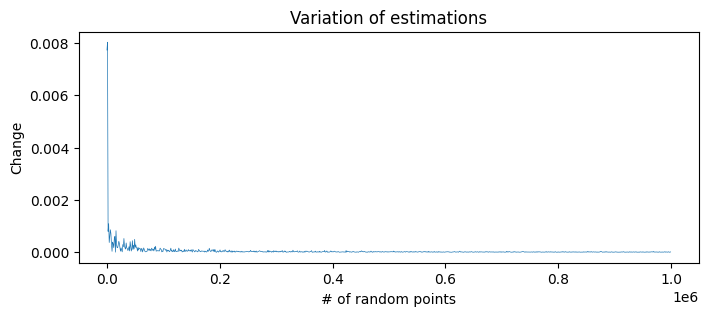

In [9]:
# Variations
plt.figure(figsize=(8,3))
plt.plot(np.linspace(0, 999*1000, 998), abs(np.diff(np.array(mean_list))), lw = 0.5)

plt.title("Variation of estimations")
plt.xlabel("# of random points")
plt.ylabel("Change")

plt.show()

The difference is quite low after $\sim 0.5e6$ number of points.

### (c) Confirm the obtained value by doing it in another way. Do not use `for` loops.

If you thought of a similar solution to this one first, congrats! This is the best way of doing it because it's shorter, faster and allows us to use a much larger number of points. My computer didn't have any problems handling this many points.

In [10]:
# Number of points
n_points = 50_000_000

# Generate pairs of random points (matrices)
points1 = np.random.random((n_points, 2))
points2 = np.random.random((n_points, 2))

# Distance
distances = np.sqrt(np.sum((points1 - points2)**2, axis=1))

# And get the mean
mean = np.mean(distances)

# Print
print(f"Result: {mean:.6f}")

Result: 0.521401


In Monte Carlo, **the more points, the better the result**.

### (d) Calculate it analytically.

---
In principle, we would calculate it with this integral
$$
\int\int\int\int_{[0, 1]⁴}\sqrt{(x_{1}-x_{0})^{2}+(y_{1}-y_{0})^{2}}\,dx_0\,dx_1\,dy_0\,dy_1,
$$
but the operation is computationally expensive to do (try it!). **We need to look at the problem in a different way.**

#### Solution
Via probability theory, the integral above can be found to be equivalent to
$$
\langle d \rangle = 4\int\int_{[0, 1]^2}\underbrace{(1-x)(1-y)}_{\rm PDF}\,\underbrace{\sqrt{x^2+y^2}}_{\rm distance}\,dx\,dy.
$$
Remember that an expected value is obtained by multiplying the value by its probability.

---

#### Why is the PDF equal to $(1-x)(1-y)$?
Since we want to know the expectation value of the distance, the PDF should be of distance too.

For illustration, we'll use the two $x$ coordinates of random points when getting the distance. Given that they are randomly generated, they can be seen as *uniform distributions* between $[0, 1]$. They are defined in the same interval, but have different values. 

Then, the distribution of the distance between them can take values between $[-1,1]$, and, more interestingly, its difference defines a *triangular distribution*. This is shown below.

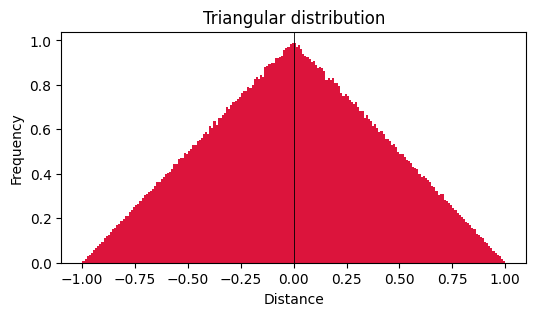

In [11]:
# Generate two uniform distribution between [0, 1]
x_0 = np.random.random(10_000_00)
x_1 = np.random.random(10_000_00)

# Get the distance distribution
diff_distro = x_0 - x_1

# And see it
plt.figure(figsize=(6,3))
plt.title("Triangular distribution")
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.hist(diff_distro, bins = 200, density = True, color = "crimson")
plt.axvline(0, color = 'k', lw = 0.6)
plt.show()

So that, the distance distribution between the $x$ coordinates can be modeled with $1-|x|$. The same principle applies for the $y$ part, and because they are indepedent of each other, the resulting PDF is $(1-|x|)(1-|y|)$. Finally, because of symmetry, we can integrate both from $0$ to $1$, and that's why the integral has a factor of $4$.

**Comment:** To see why the resulting distribution is triangular, think about the possible combinations when substracting two random numbers between $[0,1]$. What are the least and the most probable combinations?

Let's go back to the problem!

---

In [12]:
# Define the symbols
x, y = sp.symbols("x y", real = True)

# and the integrand
integrand = 4*(1-x)*(1-y)*sp.sqrt(x**2 + y**2)

In [13]:
# 1st integral
first = sp.integrate(integrand, (x, 0, 1))

# 2nd integral
result = sp.integrate(first, (y, 0, 1))

In [14]:
# See the first result
first

-(1 - y)*(2*y**2*Piecewise((0, y**2 > 0), (log(2*Abs(y)), True)) - 4*y**2*Abs(y)/3) + (1 - y)*(2*y**2*Piecewise((asinh(1/Abs(y)), y**2 > 0), (log(2*sqrt(y**2 + 1) + 2), True)) + (2/3 - 4*y**2/3)*sqrt(y**2 + 1))

Awful.

In [15]:
# And the exact result
result

sqrt(2)/15 + 2/15 + log(1 + sqrt(2))/3

Not so awful.

In [16]:
# To evaluate it, we can use sp.lambdify in this way
exact_value = sp.lambdify((), result, 'numpy')

# Print it
print(f"The exact value is {exact_value()}.")

The exact value is 0.5214054331647207.


We have now done it in three ways and gotten the same result!

## 2. Any polygon

**Comment**: This problem would be more suitable for homework than for a quiz.

As just seen, the unit square problem isn't that hard to solve without Monte Carlo. On the contrary, the average distance of two points inside an *arbitrary polygon* is much more complex and tedious to solve analytically. In cases like this, **Monte Carlo methods are preferred.**

### (a) Generate random points inside a polygon of your choice (not the square), and calculate the average distance of two points in it. **Hint**: You can use the function `Polygon` from `shapely.geometry` to get polygons.

In [17]:
# Library
from shapely.geometry import Point, Polygon

In [18]:
# Vertices of some polygon options, choose one!
irregular = [(1, 0), (5,5), (9, 0), (10,5),
             (13,2), (10, 10), (8, 5), (5, 8),
             (2, 5), (0, 10)]

cat = [(2, 8), (3, 10), (4, 8), (5, 8), (6, 8),
       (7, 10), (8, 8), (9.5, 5), (8, 2),
       (5, 1), (2, 2), (0.5, 5)]

theta = np.linspace(0, 2*np.pi, 1000)
r = 10 * (0.2 + 0.2*np.cos(10*theta))
flower = list(zip(r*np.cos(theta), r*np.sin(theta)))

I'll get `cat`, but you might use `irregular`, `flower` or any other.

In [19]:
# Get the polygon
polygon = Polygon(cat)

In [20]:
# Get the arrays for plotting
x, y = polygon.exterior.xy

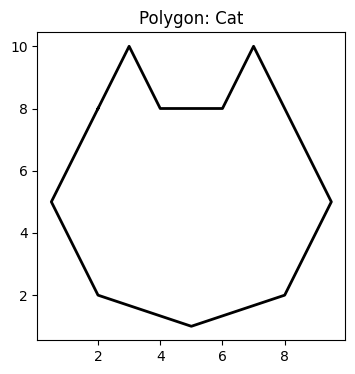

In [21]:
# Plot!
plt.figure(figsize=(4, 4))
plt.title("Polygon: Cat")
plt.plot(x, y, lw = 2, color = "k")
plt.gca().set_aspect('equal')
plt.show()

We are going to generate random numbers in a **square domain that fully covers the polygon**, and then select the points that lie inside of it.

In [22]:
# Random numbers in a square domain
points_x = np.random.uniform(np.min(np.array(x)), np.max(np.array(x)), 10_000)
points_y = np.random.uniform(np.min(np.array(y)), np.max(np.array(y)), 10_000)

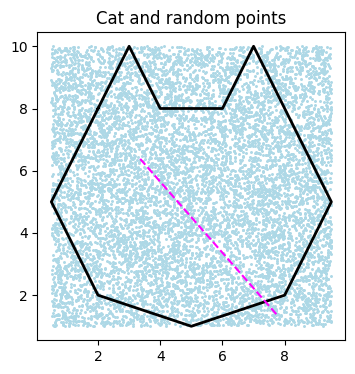

In [23]:
# Plot!
plt.figure(figsize=(4, 4))
plt.title("Cat and random points")

# Polygon and points
plt.plot(x, y, lw = 2, color = "k")
plt.scatter(points_x, points_y, marker = '.', color = "lightblue", s = 5)

# Random line
plt.plot(points_x[2581:2583], points_y[2581:2583], ls = '--', color = 'magenta')

plt.gca().set_aspect('equal')
plt.show()
plt.close()

---
To determine which points are inside a polygon, we can use the [ray tracing algorithm](https://en.wikipedia.org/wiki/Point_in_polygon). 

The idea is to test how many times a ray, starting from the point and going in any fixed direction, intersects the edges of the polygon. If the point is on the inside of the polygon, the ray will intersect its edge an *odd number* of times. Otherwise (even), it's on the outside. Simple and quite clever.

This is implemented by the method `Polygon.contains()`.

---

In [24]:
# Empty list
inside = []

# And determine which are inside with this loop
for i in range(10_000):
    in_or_out = polygon.contains(Point(points_x[i], points_y[i]))
    inside.append(in_or_out)

In [25]:
# Replace the ones outside by NaN's
inside_x = np.where(np.array(inside) == True, points_x, np.nan)
inside_y = np.where(np.array(inside) == True, points_y, np.nan)

# And remove the NaN's
inside_x_clean = inside_x[~np.isnan(inside_x)]
inside_y_clean = inside_y[~np.isnan(inside_y)]

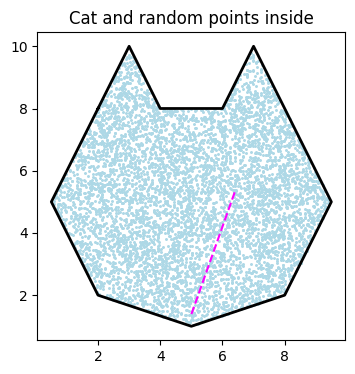

In [26]:
# Plot
plt.figure(figsize=(4, 4))
plt.title("Cat and random points inside")

# Polygon and points
plt.plot(x, y, lw = 2, color = "k")
plt.scatter(inside_x_clean, inside_y_clean, marker = '.', color = "lightblue", s = 5)

# Random line
plt.plot(inside_x_clean[2581:2583], inside_y_clean[2581:2583], ls = '--', color = 'magenta')

plt.gca().set_aspect('equal')
plt.show()
plt.close()

In [27]:
# Finally, calculate the mean distance as
mean_distance = np.mean(np.sqrt(np.diff(inside_x_clean)**2 + np.diff(inside_y_clean)**2))

# Report
print(f"Mean distance of two random points in the polygon: {mean_distance:.3}.")

Mean distance of two random points in the polygon: 3.75.


This is it, thank you.

🐰🪻